In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns





### Carga de csv

In [ ]:
df= pd.read_csv("winequality-red.csv")
display(df.sample(5))



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1021,11.3,0.36,0.66,2.4,0.123,3.0,8.0,0.99642,3.20,0.53,11.9,6
1048,9.3,0.49,0.36,1.7,0.081,3.0,14.0,0.99702,3.27,0.78,10.9,6
181,8.9,0.61,0.49,2.0,0.270,23.0,110.0,0.99720,3.12,1.02,9.3,5
1541,7.4,0.25,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.9,7
920,9.6,0.41,0.37,2.3,0.091,10.0,23.0,0.99786,3.24,0.56,10.5,5


### Preprocesamiento

In [13]:
print(df.isnull().sum())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [14]:
df_processed = df.copy()


In [19]:
df_processed['quality_label'] = df['quality'].apply(lambda q:1 if q>= 6 else 0)
display(df_processed.sample(5))


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
1037,7.3,0.910,0.10,1.8,0.074,20.0,56.0,0.99672,3.35,0.56,9.2,5,0
1348,7.2,0.655,0.03,1.8,0.078,7.0,12.0,0.99587,3.34,0.39,9.5,5,0
224,8.4,0.635,0.36,2.0,0.089,15.0,55.0,0.99745,3.31,0.57,10.4,4,0
806,8.4,0.250,0.39,2.0,0.041,4.0,10.0,0.99386,3.27,0.71,12.5,7,1
679,10.8,0.260,0.45,3.3,0.060,20.0,49.0,0.99720,3.13,0.54,9.6,5,0


### standarizar variables numericas

In [22]:
features= df_processed.columns[:-2]
display(features)
type(features)


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

pandas.core.indexes.base.Index

In [24]:
x = df_processed[features]
display(x.sample(5))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
522,8.2,0.390,0.49,2.3,0.099,47.0,133.0,0.99790,3.38,0.99,9.8
1544,8.4,0.370,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2
711,8.9,0.565,0.34,3.0,0.093,16.0,112.0,0.99980,3.38,0.61,9.5
986,9.8,0.340,0.39,1.4,0.066,3.0,7.0,0.99470,3.19,0.55,11.4
887,10.7,0.520,0.38,2.6,0.066,29.0,56.0,0.99577,3.15,0.79,12.1


In [25]:
y = df_processed['quality_label']
display(y.sample(5))

899     0
84      1
1082    1
389     1
568     1
Name: quality_label, dtype: int64

In [29]:
def zscore(col):
    return round((col - col.mean()) / col.std(),3)

In [30]:
X_std = x.apply(zscore)
display(X_std.sample(5))


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1389,-0.930,-0.267,-1.288,-0.240,-0.159,1.924,1.962,-0.798,-1.367,-0.756,-0.678
1263,-0.069,1.408,-1.391,-0.240,0.033,-0.275,-0.622,0.558,0.381,-1.169,-0.772
1296,-0.988,0.571,-1.391,1.249,0.118,3.358,0.943,-0.618,-0.720,-1.228,-0.866
92,0.161,-0.211,0.098,-0.382,0.479,0.299,2.631,0.240,-2.469,7.798,-0.585
231,-0.184,-0.826,-1.083,-0.524,-0.201,-0.370,0.077,-0.263,0.381,-0.815,-0.491


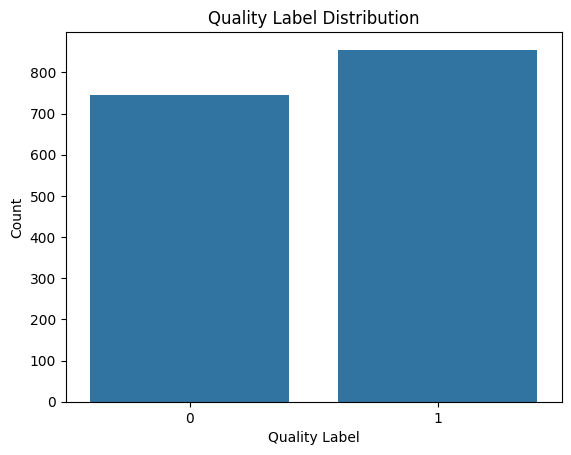

In [31]:
sns.countplot(x='quality_label', data=df_processed)
plt.title('Quality Label Distribution')
plt.xlabel('Quality Label') 
plt.ylabel('Count')
plt.show()

### split in train and validation data

In [39]:
import sys
!{sys.executable} -m pip install -U scikit-learn



'c:\Users\Jefferson' is not recognized as an internal or external command,
operable program or batch file.


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

ModuleNotFoundError: No module named 'sklearn'

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
model=LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
accuracy = model.score(X_test, y_test)
print(f"Accuaracy of logistic regresion model": {accuracy:.2f}")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_accuracy = knn_model.score(X_test, y_test)  
print(f"Accuracy of KNN model: {knn_accuracy:.2f}")


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)
mlp_accuracy = mlp_model.score(X_test, y_test)
print(f"Accuracy of MLP model: {mlp_accuracy:.2f}")

In [36]:
conffusion_matrix = pd.crosstab(y_test, model.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
print("Confusion Matrix:")


NameError: name 'y_test' is not defined